In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import math
import re
from datetime import datetime
from datetime import timezone
import maya
from collections import Counter
from glob import glob
from ast import literal_eval
import sys
import json
import cProfile
import time
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from scipy import spatial

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

from scipy.spatial.distance import cosine

#%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [165]:
f = open("Simulation_Data2.txt").read()[1:].split("\n")
f

["['lru_c']",
 'tests',
 '[-1, -1, 5]',
 'True',
 '0.7',
 '1',
 '0',
 '0',
 '[81097947.776]',
 '[12298945.6094376]',
 '[0.7208529339631826]',
 '[11974.220000000001]',
 "['lru_c']",
 '[543.8650770187378]',
 "['']",
 "['']",
 "['']",
 '1',
 '',
 '',
 '',
 '',
 "['lru_c']",
 'tests',
 '[-1, -1, 11]',
 'True',
 '0.7',
 '1',
 '0',
 '0',
 '[72312424.064]',
 '[11675584.000060221]',
 '[0.7362643592458076]',
 '[21130.404]',
 "['lru_c']",
 '[579.5759952068329]',
 "['']",
 "['']",
 "['']",
 '1',
 '',
 '',
 '',
 '',
 "['lru_c']",
 'tests',
 '[-1, -1, 17]',
 'True',
 '0.7',
 '1',
 '0',
 '0',
 '[67157672.94800001]',
 '[11295052.841002487]',
 '[0.7438918131501792]',
 '[38130.280000000006]',
 "['lru_c']",
 '[607.3328440189362]',
 "['']",
 "['']",
 "['']",
 '1',
 '',
 '',
 '',
 '',
 "['lru_c']",
 'tests',
 '[-1, -1, 23]',
 'True',
 '0.7',
 '1',
 '0',
 '0',
 '[65038239.388]',
 '[10826680.09722823]',
 '[0.7534886758991436]',
 '[53344.70000000001]',
 "['lru_c']",
 '[644.2045352458954]',
 "['']",
 "['']",


In [235]:
files, rowlen = [], []

files.append(open("Simulation_Data2.txt").read()[1:].split("\n"))
rowlen.append(18)
files.append(open("Simulation_Data3.txt").read()[1:].split("\n"))
rowlen.append(18)
files.append(open("Simulation_Data4.txt").read()[1:].split("\n"))
rowlen.append(18)


df = pd.DataFrame(columns=['type', 'data', 'container size', 'cache size constraint', 'capacity', 'version', 
                           'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic', 'total_size', 
                           'total_time', 'hitrate', 'cache_size', 'names', 'runtime', 
                           'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe'])

for ijk in np.arange(len(files)):
    
    f = files[ijk]
    rl = rowlen[ijk]
    
    total_index = 0
    total_limit = len(f)

    while True:
        i = 0
        l1, l2, l3, l4 = [], [], [], []

        num_type = len(literal_eval(f[0]))
        while i < rl:

            # Constraints get a special case
            if i == 2:
                constraints = literal_eval(f[i])
                for j in np.arange(3):
                    val = constraints[j]
                    l1.append(val)
                    l2.append(val)
                    l3.append(val)
                    l4.append(val)
            # List format
            elif f[i][0] == '[':
                entry = literal_eval(f[i])

                l1.append(entry[0])
                if (num_type >= 2):
                    l2.append(entry[1])
                    if (num_type >= 3):
                        l3.append(entry[2])
                        if (num_type >= 4):
                            l4.append(entry[3])

            # Non-list format
            else:
                val = f[i]
                try:
                    val = float(val)
                except:
                    pass
                l1.append(val)
                l2.append(val)
                l3.append(val)
                l4.append(val)

            i += 1
            total_index += 1
        
        if rl == 14:
            l1.extend(["a", "", "", ""])
            l2.extend(["a", "", "", ""])
            l3.extend(["a", "", "", ""])
            l4.extend(["a", "", "", ""])

        s1 = pd.Series(l1, index = df.columns)
        df = df.append(s1, ignore_index=True)
        if (num_type >= 2):
            s2 = pd.Series(l2, index = df.columns)
            df = df.append(s2, ignore_index=True)
            if (num_type >= 3):
                s3 = pd.Series(l3, index = df.columns)
                df = df.append(s3, ignore_index=True)
                if (num_type >= 4):
                    s4 = pd.Series(l4, index = df.columns)
                    df = df.append(s4, ignore_index=True)

        if (total_index == total_limit):
            break
            

        while (f[i] == ''):
            i += 1
            total_index += 1
            if (total_index == total_limit):
                break

        if (total_index == total_limit):
            break

        f = f[i:]
    
df["runtime hrs"] = df["runtime"] / 60 / 60

df = df.drop_duplicates(subset=['type', 'data', 'container size', 'cache size constraint', 'capacity',
       'version', 'alpha', 'xtra_vers', 'xtra_stat1', 'xtra_dynamic',
       'total_size', 'total_time', 'hitrate', 'cache_size', 'names',
       'stat_version', 'heuristic_ct', 'heuristic_cache', 'cache_safe'])

In [236]:
df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
0,lru_c,tests,-1,-1,5,True,0.7,1.0,0.0,0.0,...,1.229895e+07,0.720853,11974.220,lru_c,543.865077,,,,1.0,0.151074
1,lru_c,tests,-1,-1,11,True,0.7,1.0,0.0,0.0,...,1.167558e+07,0.736264,21130.404,lru_c,579.575995,,,,1.0,0.160993
2,lru_c,tests,-1,-1,17,True,0.7,1.0,0.0,0.0,...,1.129505e+07,0.743892,38130.280,lru_c,607.332844,,,,1.0,0.168704
3,lru_c,tests,-1,-1,23,True,0.7,1.0,0.0,0.0,...,1.082668e+07,0.753489,53344.700,lru_c,644.204535,,,,1.0,0.178946
4,lru_c,tests,-1,-1,29,True,0.7,1.0,0.0,0.0,...,1.034762e+07,0.763246,60758.384,lru_c,656.365783,,,,1.0,0.182324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,lru_c,tests,-1,-1,10,False,0.7,0.0,0.0,0.0,...,9.535120e+06,0.761730,4483.680,lru_c,340.771590,,,,0.0,0.094659
365,lru_c,tests,-1,-1,15,False,0.7,0.0,0.0,0.0,...,7.901549e+06,0.803308,5222.472,lru_c,310.056310,,,,0.0,0.086127
366,lru_c,tests,-1,-1,20,False,0.7,0.0,0.0,0.0,...,6.862404e+06,0.830033,6372.036,lru_c,292.751203,,,,0.0,0.081320
367,lru_c,tests,-1,-1,25,False,0.7,0.0,0.0,0.0,...,6.127692e+06,0.848793,8287.220,lru_c,280.912522,,,,0.0,0.078031


just an example for now

In [237]:
#land_stat_df = df[(df["xtra_stat1"].apply(lambda x: type(x)) == float) & (df["type"] == "lru_c")]
land_stat_df = df[(df["xtra_stat1"] > 0) & (df["type"] == "lru_c")]
land_stat_df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
30,lru_c,tests,-1,-1,5,True,0.7,0.0,1.0,0.0,...,1.378035e+07,0.681234,17068.180,lru_c,529.421920,a,,,1.0,0.147062
31,lru_c,tests,-1,-1,11,True,0.7,0.0,1.0,0.0,...,1.333094e+07,0.693683,33503.064,lru_c,564.768996,a,,,1.0,0.156880
32,lru_c,tests,-1,-1,17,True,0.7,0.0,1.0,0.0,...,1.302340e+07,0.699532,53789.368,lru_c,605.649127,a,,,1.0,0.168236
33,lru_c,tests,-1,-1,23,True,0.7,0.0,1.0,0.0,...,1.252679e+07,0.712889,70258.724,lru_c,631.897072,a,,,1.0,0.175527
34,lru_c,tests,-1,-1,29,True,0.7,0.0,1.0,0.0,...,1.198405e+07,0.724927,83509.528,lru_c,655.077242,a,,,1.0,0.181966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,lru_c,tests,-1,-1,15,True,0.7,0.0,1.0,0.0,...,1.593680e+07,0.631006,49832.832,lru_c,690.627044,a,,,0.0,0.191841
340,lru_c,tests,-1,-1,15,True,0.7,0.0,1.0,0.0,...,1.185817e+07,0.724107,44537.440,lru_c,555.774499,a,,,2.0,0.154382
341,lru_c,tests,-1,-1,15,True,0.7,0.0,1.0,0.0,...,1.028565e+07,0.759083,35548.456,lru_c,505.791410,a,,,4.0,0.140498
342,lru_c,tests,-1,-1,15,True,0.7,0.0,1.0,0.0,...,9.198915e+06,0.782945,34316.700,lru_c,472.512362,a,,,6.0,0.131253


<AxesSubplot:xlabel='total_size', ylabel='total_time'>

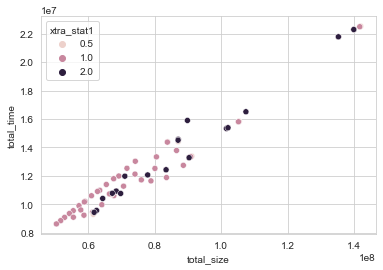

In [164]:
sns.scatterplot(x="total_size", y="total_time", hue="xtra_stat1", data=land_stat_df)

In [121]:
lruc_dynamic_df = df[(df["xtra_dynamic"].apply(lambda x: type(x)) == float) & (df["type"] == "land")]
lruc_dynamic_df

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,total_size,total_time,hitrate,cache_size,names,runtime,runtime hrs
49,land,tests,-1,-1,10,True,0.7,False,False,0.5,1.459686e+08,2.294074e+07,0.370949,0.0,land,3562.792023,0.989664
52,land,tests,-1,-1,10,True,0.7,False,False,0.75,1.710444e+08,2.570568e+07,0.183591,25.0,land,4152.112312,1.153365
55,land,tests,-1,-1,10,True,0.7,False,False,1.0,1.811402e+08,2.733821e+07,0.001824,0,land,2196.969493,0.610269
58,land,tests,-1,-1,10,True,0.7,False,False,1.25,1.811404e+08,2.733824e+07,0.001822,0,land,2181.100989,0.605861
61,land,tests,-1,-1,10,True,0.7,False,False,1.5,1.811404e+08,2.733824e+07,0.001822,0,land,2090.005492,0.580557


<AxesSubplot:xlabel='total_size', ylabel='total_time'>

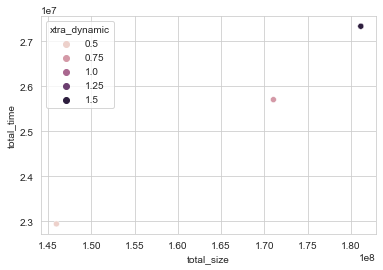

In [122]:
sns.scatterplot(x="total_size", y="total_time", hue="xtra_dynamic", data=lruc_dynamic_df)

# Functions

In [203]:
def run_plot(df, xd, yd, flds):
    # CREATE NEW COLUMN OF CONCATENATED VALUES
    df['_'.join(flds)] =  pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')

    # PLOT WITH hue
    sns.relplot(x=xd, y=yd, hue='_'.join(flds), data=df, aspect=1.5)
    plt.show()

    plt.clf()
    plt.close()

In [224]:
# 0s and 1s in xtras only
def binary_extra(vdf):
    vdf = vdf[(vdf["xtra_dynamic"] != 2) & (vdf["xtra_dynamic"] != 0.5)]
    vdf = vdf[(vdf["xtra_vers"] != 2) & (vdf["xtra_vers"] != 0.5)]
    vdf = vdf[(vdf["xtra_stat1"] != 2) & (vdf["xtra_stat1"] != 0.5)]
    return vdf
    
# xtra column is not 0
def nonzero_col(vdf, col):
    vdf = vdf[(vdf[col] != 0)]
    return vdf

# base case of 0s
def add_zeros(vdf):
    pass

# filter cache_safe
def cache_safe(vdf, l):
    vdf = vdf[vdf["cache_safe"] == l[0]]
    for i in l[1:]:
        vdf = vdf.append(vdf[vdf["cache_safe"] == i])
    return vdf

## 1. PARAM: Capacity & Container Size


In [241]:
odf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 0) & (df["version"] == "True")]
odf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
252,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,0.0,...,1.273585e+07,0.676420,923.508,lru_c,512.400396,,,,0.0,0.142333
253,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,0.0,...,9.535120e+06,0.761730,4483.680,lru_c,455.573938,,,,0.0,0.126548
254,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,0.0,...,7.901549e+06,0.803308,5222.472,lru_c,430.695973,,,,0.0,0.119638
255,lru_c,tests,-1,-1,20,True,0.7,0.0,0.0,0.0,...,6.862404e+06,0.830033,6372.036,lru_c,419.048823,,,,0.0,0.116402
256,lru_c,tests,-1,-1,25,True,0.7,0.0,0.0,0.0,...,6.127692e+06,0.848793,8287.220,lru_c,413.193753,,,,0.0,0.114776
257,lru_c,tests,-1,-1,30,True,0.7,0.0,0.0,0.0,...,5.569231e+06,0.862803,11225.132,lru_c,409.274207,,,,0.0,0.113687


<AxesSubplot:xlabel='capacity', ylabel='total_time'>

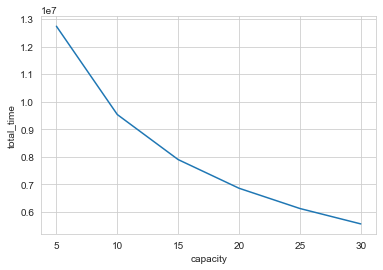

In [307]:
sns.lineplot(x="capacity", y="total_time", data=odf)

## 2. PARAM: Version


In [270]:
tdf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 0)]
tdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
252,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,0.0,...,1.273585e+07,0.676420,923.508,lru_c,512.400396,,,,0.0,0.142333
253,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,0.0,...,9.535120e+06,0.761730,4483.680,lru_c,455.573938,,,,0.0,0.126548
254,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,0.0,...,7.901549e+06,0.803308,5222.472,lru_c,430.695973,,,,0.0,0.119638
255,lru_c,tests,-1,-1,20,True,0.7,0.0,0.0,0.0,...,6.862404e+06,0.830033,6372.036,lru_c,419.048823,,,,0.0,0.116402
256,lru_c,tests,-1,-1,25,True,0.7,0.0,0.0,0.0,...,6.127692e+06,0.848793,8287.220,lru_c,413.193753,,,,0.0,0.114776
257,lru_c,tests,-1,-1,30,True,0.7,0.0,0.0,0.0,...,5.569231e+06,0.862803,11225.132,lru_c,409.274207,,,,0.0,0.113687
363,lru_c,tests,-1,-1,5,False,0.7,0.0,0.0,0.0,...,1.273585e+07,0.676420,923.508,lru_c,400.458279,,,,0.0,0.111238
364,lru_c,tests,-1,-1,10,False,0.7,0.0,0.0,0.0,...,9.535120e+06,0.761730,4483.680,lru_c,340.771590,,,,0.0,0.094659
365,lru_c,tests,-1,-1,15,False,0.7,0.0,0.0,0.0,...,7.901549e+06,0.803308,5222.472,lru_c,310.056310,,,,0.0,0.086127
366,lru_c,tests,-1,-1,20,False,0.7,0.0,0.0,0.0,...,6.862404e+06,0.830033,6372.036,lru_c,292.751203,,,,0.0,0.081320


## 3. PARAM: xtra

In [332]:
xdf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 1) & (df["cache_safe"] == 6) & (df["capacity"] % 5 == 0)]
xdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
85,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,1.0,...,1.187771e+07,0.700238,1081.660,lru_c,764.316988,,,,6.0,0.212310
350,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,1.079398e+07,0.730551,1839.696,lru_c,725.355756,,,,6.0,0.201488
355,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,1.0,...,1.039480e+07,0.743739,3159.984,lru_c,713.282668,,,,6.0,0.198134


In [338]:
tdf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 0) & (df["capacity"] <= 15) & (df["version"] == "True")]
tdf["hue"] = "None"
tdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs,hue
252,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,0.0,...,0.676420,923.508,lru_c,512.400396,,,,0.0,0.142333,None
253,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,0.0,...,0.761730,4483.680,lru_c,455.573938,,,,0.0,0.126548,None
254,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,0.0,...,0.803308,5222.472,lru_c,430.695973,,,,0.0,0.119638,None


In [322]:
abcdf = xdf.append(tdf, ignore_index=True)
abcdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
0,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,1.0,...,1.187771e+07,0.700238,1081.660,lru_c,764.316988,,,,6.0,0.212310
1,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,1.079398e+07,0.730551,1839.696,lru_c,725.355756,,,,6.0,0.201488
2,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,1.0,...,1.039480e+07,0.743739,3159.984,lru_c,713.282668,,,,6.0,0.198134
3,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,0.0,...,1.273585e+07,0.676420,923.508,lru_c,512.400396,,,,0.0,0.142333
4,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,0.0,...,9.535120e+06,0.761730,4483.680,lru_c,455.573938,,,,0.0,0.126548
5,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,0.0,...,7.901549e+06,0.803308,5222.472,lru_c,430.695973,,,,0.0,0.119638


In [339]:
adf = df[(df["xtra_vers"] == 1) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 0) & (df["cache_safe"] == 6) & (df["capacity"] % 5 == 0)]
adf["hue"] = "xtra_vers"
bdf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 1) & (df["xtra_dynamic"] == 0) & (df["cache_safe"] == 6) & (df["capacity"] % 5 == 0)]
bdf["hue"] = "xtra_stat1"
cdf = df[(df["xtra_vers"] == 0) & (df["xtra_stat1"] == 0) & (df["xtra_dynamic"] == 1) & (df["cache_safe"] == 6) & (df["capacity"] % 5 == 0)]
cdf["hue"] = "xtra_dynamic"

abcdf = adf.append(bdf, ignore_index=True).append(cdf, ignore_index=True).append(tdf, ignore_index=True)
abcdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs,hue
0,lru_c,tests,-1,-1,5,True,0.7,1.0,0.0,0.0,...,0.700238,1081.660,lru_c,478.454718,,,,6.0,0.132904,xtra_vers
1,lru_c,tests,-1,-1,10,True,0.7,1.0,0.0,0.0,...,0.803452,15592.356,lru_c,458.257552,,,,6.0,0.127294,xtra_vers
2,lru_c,tests,-1,-1,15,True,0.7,1.0,0.0,0.0,...,0.813298,24040.628,lru_c,481.697454,,,,6.0,0.133805,xtra_vers
3,lru_c,tests,-1,-1,5,True,0.7,0.0,1.0,0.0,...,0.700238,1081.660,lru_c,449.135446,a,,,6.0,0.124760,xtra_stat1
4,lru_c,tests,-1,-1,10,True,0.7,0.0,1.0,0.0,...,0.775457,20686.316,lru_c,449.469008,a,,,6.0,0.124853,xtra_stat1
5,lru_c,tests,-1,-1,15,True,0.7,0.0,1.0,0.0,...,0.782945,34316.700,lru_c,472.512362,a,,,6.0,0.131253,xtra_stat1
6,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,1.0,...,0.700238,1081.660,lru_c,764.316988,,,,6.0,0.212310,xtra_dynamic
7,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,0.730551,1839.696,lru_c,725.355756,,,,6.0,0.201488,xtra_dynamic
8,lru_c,tests,-1,-1,15,True,0.7,0.0,0.0,1.0,...,0.743739,3159.984,lru_c,713.282668,,,,6.0,0.198134,xtra_dynamic
9,lru_c,tests,-1,-1,5,True,0.7,0.0,0.0,0.0,...,0.676420,923.508,lru_c,512.400396,,,,0.0,0.142333,None


<AxesSubplot:xlabel='capacity', ylabel='total_time'>

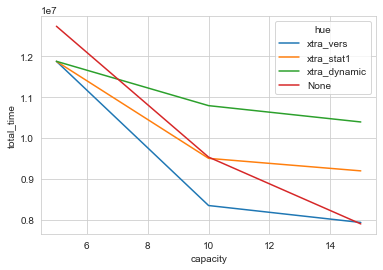

In [343]:
sns.lineplot(x="capacity", y="total_time", hue="hue", data=abcdf)

## 4A. PARAM: heuristic_ct
## 4B. PARAM: cache_safe


In [383]:
sdf = df[(df["cache_safe"] != 0) & (df["capacity"] == 10)]
sdf

,type,data,container size,cache size constraint,capacity,version,alpha,xtra_vers,xtra_stat1,xtra_dynamic,...,total_time,hitrate,cache_size,names,runtime,stat_version,heuristic_ct,heuristic_cache,cache_safe,runtime hrs
91,lru_c,tests,-1,-1,10,True,0.7,0.5,0.5,0.0,...,1.076884e+07,0.754433,25170.780,lru_c,547.128058,a,A,,2.0,0.151980
92,lru_c,tests,-1,-1,10,True,0.7,0.5,0.5,0.0,...,9.424595e+06,0.782126,22017.696,lru_c,502.880935,a,A,,4.0,0.139689
94,lru_c,tests,-1,-1,10,True,0.7,0.5,1.0,0.0,...,1.092334e+07,0.750440,26211.172,lru_c,546.851424,a,A,,2.0,0.151903
95,lru_c,tests,-1,-1,10,True,0.7,0.5,1.0,0.0,...,9.557544e+06,0.778072,22017.696,lru_c,508.404098,a,A,,4.0,0.141223
97,lru_c,tests,-1,-1,10,True,0.7,0.5,2.0,0.0,...,1.197187e+07,0.722406,28347.236,lru_c,577.155117,a,A,,2.0,0.160321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,lru_c,tests,-1,-1,10,True,0.7,0.0,1.0,0.0,...,8.804796e+06,0.786217,8895.352,lru_c,419.505134,a,,,9.0,0.116529
348,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,1.389012e+07,0.658441,1842.488,lru_c,872.309100,,,,2.0,0.242308
349,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,1.185317e+07,0.706561,2037.548,lru_c,778.432354,,,,4.0,0.216231
350,lru_c,tests,-1,-1,10,True,0.7,0.0,0.0,1.0,...,1.079398e+07,0.730551,1839.696,lru_c,725.355756,,,,6.0,0.201488


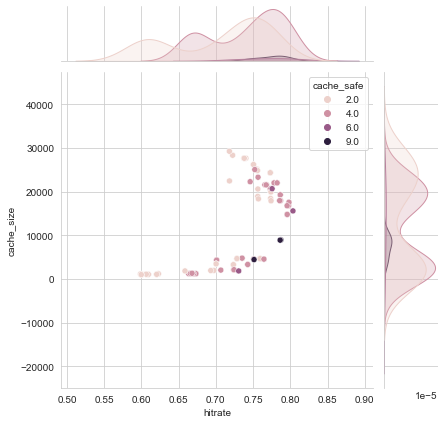

In [384]:
sns.jointplot(x="hitrate", y="cache_size", hue="cache_safe", data=sdf)

<AxesSubplot:xlabel='cache_safe', ylabel='hitrate'>

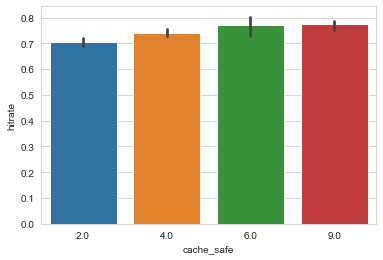

In [385]:
sns.barplot(x="cache_safe", y="hitrate", data=sdf)

<AxesSubplot:xlabel='total_size', ylabel='total_time'>

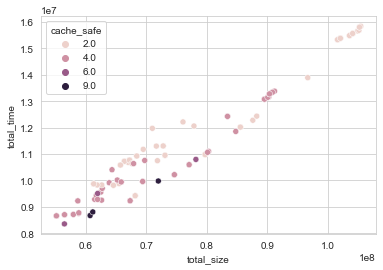

In [386]:
sns.scatterplot(x="total_size", y="total_time", hue="cache_safe", data=sdf)